# Group project
## Group number:9
## Project- Credit Card Fraud Detection
## CMPE-255


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

### Data loading and data analysis
#####  Kaggle dataset is used for this project.
##### https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

In [ ]:
RANDOM_SEED = 42
cc_data = pd.read_csv('creditcard.csv')
cc_data = cc_data.drop_duplicates()  # Drop duplicates immediately
print(f"Shape after removing duplicates: {cc_data.shape}")

Shape after removing duplicates: (283726, 31)


In [ ]:
#print the last three rows
print(cc_data.tail(3))

            Time        V1        V2        V3        V4        V5        V6  \
284804  172788.0  1.919565 -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  172788.0 -0.240440  0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  172792.0 -0.533413 -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9  ...       V21       V22       V23  \
284804 -0.296827  0.708417  0.432454  ...  0.232045  0.578229 -0.037501   
284805 -0.686180  0.679145  0.392087  ...  0.265245  0.800049 -0.163298   
284806  1.577006 -0.414650  0.486180  ...  0.261057  0.643078  0.376777   

             V24       V25       V26       V27       V28  Amount  Class  
284804  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88      0  
284805  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00      0  
284806  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00      0  

[3 rows x 31 columns]


In [ ]:
print("Columns info:",cc_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

#### Counting the number of duplicate rows and checking for missing values
##### Number of duplicate rows is 1081
##### There are no missing values

In [ ]:
print("Missing values:", cc_data.isnull().sum())

Missing values: V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Amount           0
Class            0
Amount_log       0
Amount_scaled    0
Time_diff        0
Hour_sin         0
Hour_cos         0
dtype: int64


#### Store fraud transactions in a varaible named fraud and non fraud transactions in a varialbe named non fraud

#### Statistics summary and Visualizion of the data distribution

In [ ]:
print(cc_data.describe())

                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.850134      -0.6898

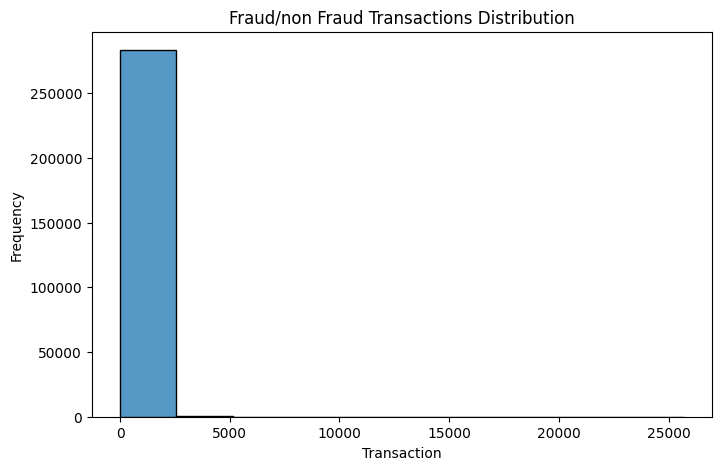

In [ ]:
# Histogram of transaction amounts
plt.figure(figsize=(8,5))
sns.histplot(cc_data['Amount'], bins=10)
plt.title("Fraud/non Fraud Transactions Distribution")
plt.xlabel("Transaction")
plt.ylabel("Frequency")
plt.show()

#### Handling the imbalanced dataset before building the model
#### by oversampling the minority class

In [ ]:
# from sklearn.utils import resample
# fraud = resample(fraud,replace=True, n_samples=284315, random_state=RANDOM_SEED)

# print(fraud.shape)
# print(non_fraud.shape)

Shape before preprocess: (283726, 32)
Duplicates: 0
count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64


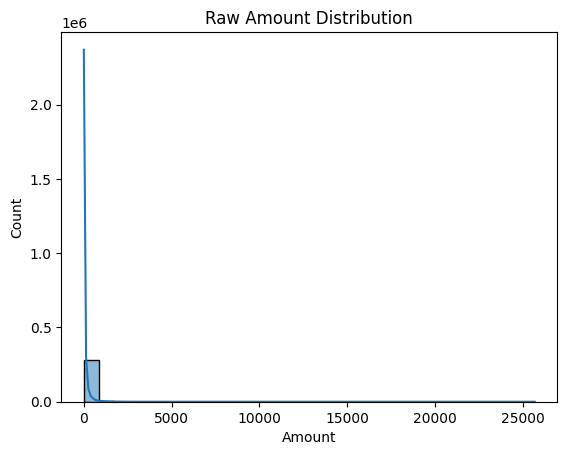

In [ ]:
#State before pre-processing
print("Shape before preprocess:", cc_data.shape)
print("Duplicates:", cc_data.duplicated().sum())
print(cc_data['Amount'].describe())
sns.histplot(cc_data['Amount'], bins=30, kde=True)
plt.title("Raw Amount Distribution")
plt.show()

Pre-process data. The importance of

dropping duplicates: Prevents models from seeing the same example multiple times, ensuring a each row is unique and maintaining representation of transaction diversity

log-transform Amount: Log transform to Amount pulls it in the right tail of large transactions, allowing for more symmetric distribution and easier to models to learn

robust scale Amount: Ensures outliers don't dominate feature space

In [ ]:
# Pre-processing: drop duplicates, log‐transform & robust‐scale Amount
cc_data['Amount_log'] = np.log1p(cc_data['Amount'])
rs = RobustScaler()
cc_data['Amount_scaled'] = rs.fit_transform(cc_data[['Amount_log']])

In [ ]:

# Step 4: Feature Engineering on Time column
# Extract hour of the day
cc_data['Hour'] = (cc_data['Time'] // 3600) % 24

# Compute time since previous transaction (sorted by Time)
cc_data = cc_data.sort_values(by='Time')
cc_data['Time_diff'] = cc_data['Time'].diff().fillna(0)

# Encode hour cyclically
cc_data['Hour_sin'] = np.sin(2 * np.pi * cc_data['Hour'] / 24)
cc_data['Hour_cos'] = np.cos(2 * np.pi * cc_data['Hour'] / 24)

# Drop original 'Time' and 'Hour' as they are now encoded
cc_data = cc_data.drop(columns=['Time', 'Hour'])


Shape after preprocess: (283726, 35)
count    283726.000000
mean          3.153760
std           1.657080
min           0.000000
25%           1.887070
50%           3.135494
75%           4.363226
max          10.153941
Name: Amount_log, dtype: float64
count    283726.000000
mean          0.007377
std           0.669215
min          -1.266275
25%          -0.504178
50%           0.000000
75%           0.495822
max           2.834412
Name: Amount_scaled, dtype: float64


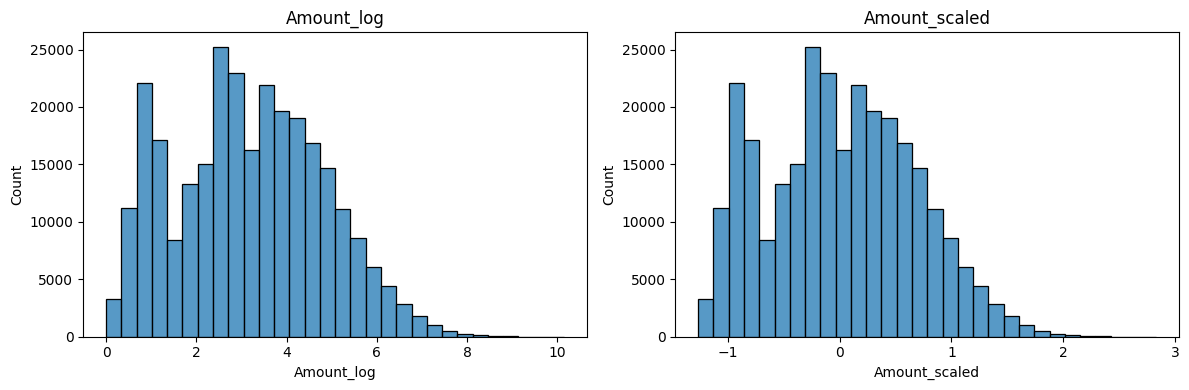

In [ ]:
#State after pre-processing
print("Shape after preprocess:", cc_data.shape)
print(cc_data['Amount_log'].describe())
print(cc_data['Amount_scaled'].describe())
fig, axes = plt.subplots(1,2,figsize=(12,4))
sns.histplot(cc_data['Amount_log'],    bins=30, ax=axes[0]).set(title="Amount_log")
sns.histplot(cc_data['Amount_scaled'], bins=30, ax=axes[1]).set(title="Amount_scaled")
plt.tight_layout()
plt.show()

In [ ]:
X = cc_data.drop(columns='Class')
y = cc_data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED
)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")
print(f"Training fraud ratio: {y_train.mean():.4f}, Test fraud ratio: {y_test.mean():.4f}")

Training set shape: (226980, 34), Test set shape: (56746, 34)
Training fraud ratio: 0.0017, Test fraud ratio: 0.0017


In [ ]:
numeric_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                    'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
                    'Amount_log', 'Time_diff', 'Hour_sin', 'Hour_cos']

In [ ]:
preprocessor_lr = ColumnTransformer(
    [('num', StandardScaler(), numeric_features)],
    remainder='passthrough'
)

preprocessor_tree = ColumnTransformer(
    [],  # No transformations needed for tree models
    remainder='passthrough'
)

In [ ]:
pipeline_lr = ImbPipeline([
    ('preprocess', preprocessor_lr),
    ('smote', SMOTE(random_state=RANDOM_SEED)),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

pipeline_dt = ImbPipeline([
    ('preprocess', preprocessor_tree),
    ('smote', SMOTE(random_state=RANDOM_SEED)),
    ('classifier', DecisionTreeClassifier(random_state=RANDOM_SEED))
])

pipeline_rf = ImbPipeline([
    ('preprocess', preprocessor_tree),
    ('smote', SMOTE(random_state=RANDOM_SEED)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED))
])

In [ ]:
print("Training Logistic Regression...")
pipeline_lr.fit(X_train, y_train)

print("Training Decision Tree...")
pipeline_dt.fit(X_train, y_train)

print("Training Random Forest...")
pipeline_rf.fit(X_train, y_train)

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough', transformers=[])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_dt = pipeline_dt.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)

In [ ]:
y_scores_lr = pipeline_lr.predict_proba(X_test)[:, 1]
y_scores_dt = pipeline_dt.predict_proba(X_test)[:, 1]
y_scores_rf = pipeline_rf.predict_proba(X_test)[:, 1]

In [ ]:
print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_lr, digits=4))
print(f"AUPRC: {average_precision_score(y_test, y_scores_lr):.4f}")


Logistic Regression Results:
              precision    recall  f1-score   support

           0     0.9998    0.9817    0.9907     56651
           1     0.0741    0.8737    0.1366        95

    accuracy                         0.9815     56746
   macro avg     0.5369    0.9277    0.5636     56746
weighted avg     0.9982    0.9815    0.9892     56746

AUPRC: 0.6812


In [ ]:
print("\nDecision Tree Results:")
print(classification_report(y_test, y_pred_dt, digits=4))
print(f"AUPRC: {average_precision_score(y_test, y_scores_dt):.4f}")


Decision Tree Results:
              precision    recall  f1-score   support

           0     0.9995    0.9979    0.9987     56651
           1     0.3497    0.6737    0.4604        95

    accuracy                         0.9974     56746
   macro avg     0.6746    0.8358    0.7296     56746
weighted avg     0.9984    0.9974    0.9978     56746

AUPRC: 0.2362


In [ ]:
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf, digits=4))
print(f"AUPRC: {average_precision_score(y_test, y_scores_rf):.4f}")


Random Forest Results:
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56651
           1     0.9250    0.7789    0.8457        95

    accuracy                         0.9995     56746
   macro avg     0.9623    0.8894    0.9227     56746
weighted avg     0.9995    0.9995    0.9995     56746

AUPRC: 0.8226


In [ ]:
precision_lr, recall_lr, thres_lr = precision_recall_curve(y_test, y_scores_lr)
f1_lr = 2 * (precision_lr * recall_lr) / (precision_lr + recall_lr + 1e-10)  # Avoid division by zero
best_idx_lr = np.nanargmax(f1_lr)
best_thres_lr = thres_lr[best_idx_lr] if best_idx_lr < len(thres_lr) else 0.5
best_f1_lr = f1_lr[best_idx_lr]
print(f"\nLogistic Regression best threshold = {best_thres_lr:.3f}, F1 = {best_f1_lr:.3f}")


Logistic Regression best threshold = 1.000, F1 = 0.804


In [ ]:
precision_dt, recall_dt, thres_dt = precision_recall_curve(y_test, y_scores_dt)
f1_dt = 2 * (precision_dt * recall_dt) / (precision_dt + recall_dt + 1e-10)
best_idx_dt = np.nanargmax(f1_dt)
best_thres_dt = thres_dt[best_idx_dt] if best_idx_dt < len(thres_dt) else 0.5
best_f1_dt = f1_dt[best_idx_dt]
print(f"Decision Tree best threshold = {best_thres_dt:.3f}, F1 = {best_f1_dt:.3f}")

Decision Tree best threshold = 1.000, F1 = 0.460


In [ ]:
precision_rf, recall_rf, thres_rf = precision_recall_curve(y_test, y_scores_rf)
f1_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf + 1e-10)
best_idx_rf = np.nanargmax(f1_rf)
best_thres_rf = thres_rf[best_idx_rf] if best_idx_rf < len(thres_rf) else 0.5
best_f1_rf = f1_rf[best_idx_rf]
print(f"Random Forest best threshold = {best_thres_rf:.3f}, F1 = {best_f1_rf:.3f}")

Random Forest best threshold = 0.370, F1 = 0.851


In [ ]:
y_pred_lr_opt = (y_scores_lr >= best_thres_lr).astype(int)
y_pred_dt_opt = (y_scores_dt >= best_thres_dt).astype(int)
y_pred_rf_opt = (y_scores_rf >= best_thres_rf).astype(int)

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr_opt)
cm_dt = confusion_matrix(y_test, y_pred_dt_opt)
cm_rf = confusion_matrix(y_test, y_pred_rf_opt)

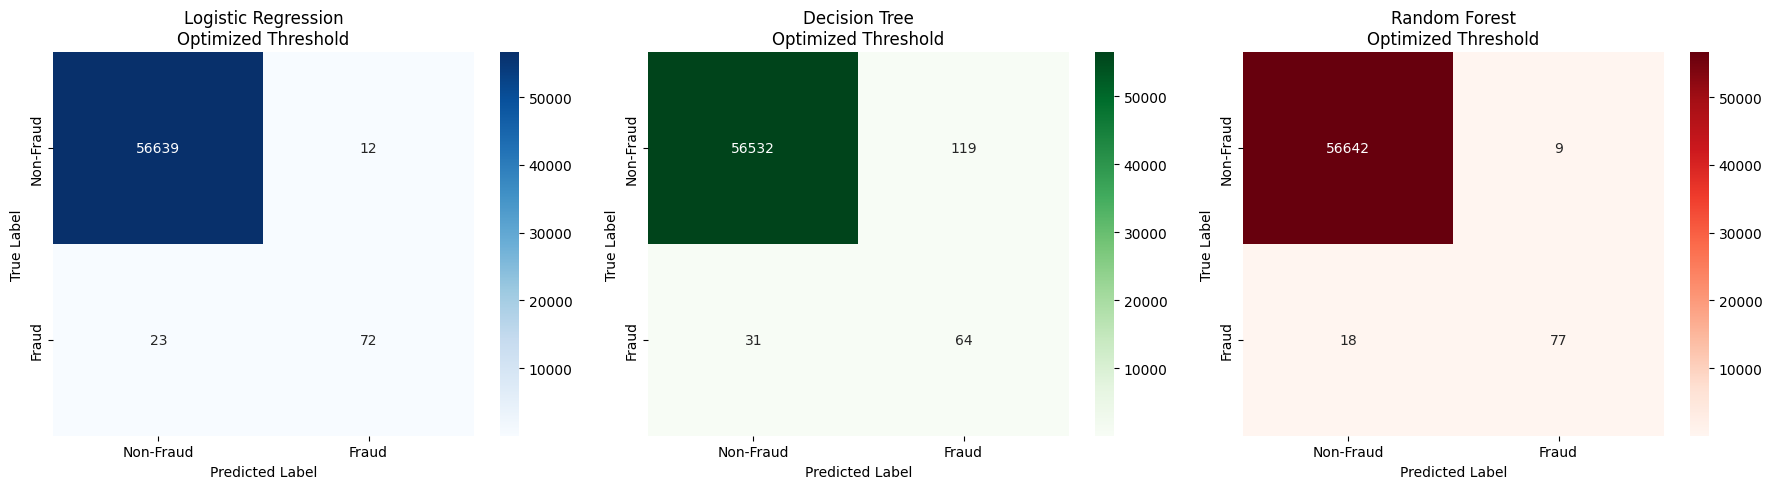

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'], ax=axes[0])
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')
axes[0].set_title('Logistic Regression\nOptimized Threshold')

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'], ax=axes[1])
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')
axes[1].set_title('Decision Tree\nOptimized Threshold')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'], ax=axes[2])
axes[2].set_ylabel('True Label')
axes[2].set_xlabel('Predicted Label')
axes[2].set_title('Random Forest\nOptimized Threshold')

plt.tight_layout()
plt.show()

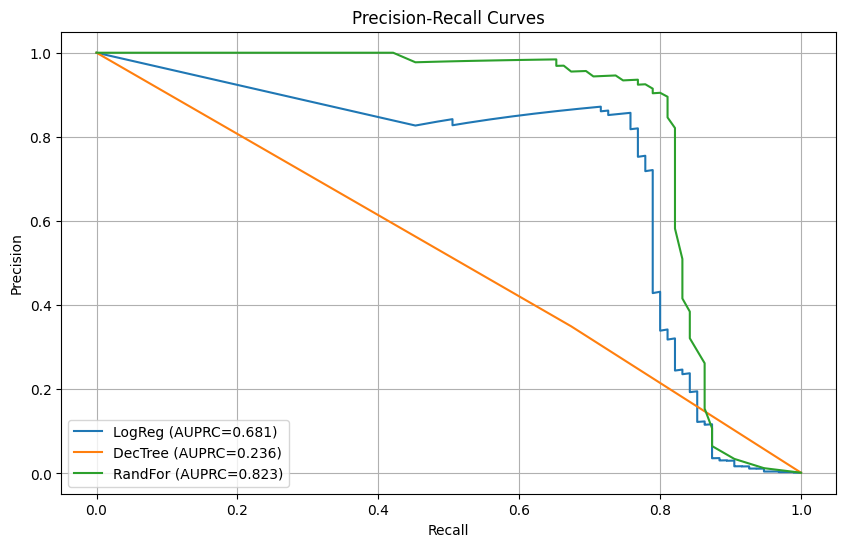

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(recall_lr, precision_lr, label=f'LogReg (AUPRC={average_precision_score(y_test, y_scores_lr):.3f})')
plt.plot(recall_dt, precision_dt, label=f'DecTree (AUPRC={average_precision_score(y_test, y_scores_dt):.3f})')
plt.plot(recall_rf, precision_rf, label=f'RandFor (AUPRC={average_precision_score(y_test, y_scores_rf):.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "AUPRC": [
        average_precision_score(y_test, y_scores_lr),
        average_precision_score(y_test, y_scores_dt),
        average_precision_score(y_test, y_scores_rf),
    ],
    "Best F1-Score": [best_f1_lr, best_f1_dt, best_f1_rf],
    "Best Threshold": [best_thres_lr, best_thres_dt, best_thres_rf],
    "True Positives": [cm_lr[1, 1], cm_dt[1, 1], cm_rf[1, 1]],
    "False Positives": [cm_lr[0, 1], cm_dt[0, 1], cm_rf[0, 1]],
    "False Negatives": [cm_lr[1, 0], cm_dt[1, 0], cm_rf[1, 0]],
    "True Negatives": [cm_lr[0, 0], cm_dt[0, 0], cm_rf[0, 0]],
}

summary_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(summary_df.round(4))


Model Performance Summary:
                 Model   AUPRC  Best F1-Score  Best Threshold  True Positives  \
0  Logistic Regression  0.6812         0.8045            1.00              72   
1        Decision Tree  0.2362         0.4604            1.00              64   
2        Random Forest  0.8226         0.8508            0.37              77   

   False Positives  False Negatives  True Negatives  
0               12               23           56639  
1              119               31           56532  
2                9               18           56642  


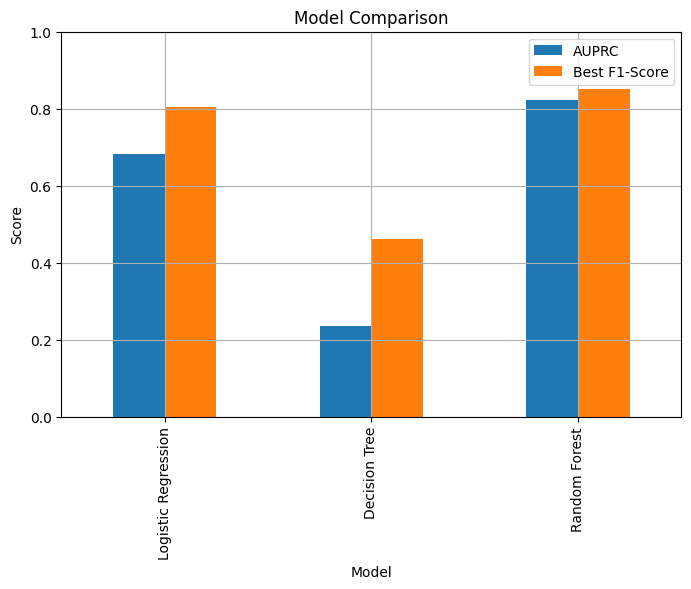

In [ ]:
summary_df.plot(
    x="Model",
    y=["AUPRC", "Best F1-Score"],
    kind="bar",
    figsize=(8, 5),
    title="Model Comparison",
    grid=True
)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()

Sample Implementation Examples

In [ ]:
from IPython.display import HTML
choices = ['TP','FP','FN']
#Logistic Regression
results_lr = pd.DataFrame({
    'Row':      X_test.index,
    'Score_LR': y_scores_lr,
    'Pred_LR':  y_pred_lr,
    'Actual':   y_test.values
})
conds_lr = [
    #TP
    (results_lr['Actual'] == 1) & (results_lr['Pred_LR'] == 1),
    #FP
    (results_lr['Actual'] == 0) & (results_lr['Pred_LR'] == 1),
    #FN
    (results_lr['Actual'] == 1) & (results_lr['Pred_LR'] == 0)
]
results_lr['Outcome'] = np.select(conds_lr, choices, default='TN')
print("---- Logistic Regression ----")
for out in ['TP','FN','FP']:
    print(f"{out} Samples")
    subset = (
        results_lr[results_lr['Outcome'] == out]
          .loc[:, ['Row','Score_LR','Pred_LR','Actual','Outcome']]
          .head(3)
    )
    display(HTML(subset.to_html(index=False)))

#Decision Tree
results_dt = pd.DataFrame({
    'Row':      X_test.index,
    'Score_DT': y_scores_dt,
    'Pred_DT':  y_pred_dt,
    'Actual':   y_test.values
})
conds_dt = [
    #TP
    (results_dt['Actual'] == 1)&(results_dt['Pred_DT'] == 1),
    #FP
    (results_dt['Actual'] == 0)&(results_dt['Pred_DT'] == 1),
    #FN
    (results_dt['Actual'] == 1)&(results_dt['Pred_DT'] == 0)
]
results_dt['Outcome'] = np.select(conds_dt, choices, default='TN')
print("------- Decision Tree -------")
for out in ['TP','FN','FP']:
    print(f"{out} Samples")
    subset = (
        results_dt[results_dt['Outcome'] == out]
          .loc[:, ['Row','Score_DT','Pred_DT','Actual','Outcome']]
          .head(3)
    )
    display(HTML(subset.to_html(index=False)))

#Random Forest
results_rf = pd.DataFrame({
    'Row':      X_test.index,
    'Score_RF': y_scores_rf,
    'Pred_RF':  y_pred_rf,
    'Actual':   y_test.values
})
conds_rf = [
    #TP
    (results_rf['Actual'] == 1)&(results_rf['Pred_RF'] == 1),
    #FP
    (results_rf['Actual'] == 0)&(results_rf['Pred_RF'] == 1),
    #FN
    (results_rf['Actual'] == 1)&(results_rf['Pred_RF'] == 0)
]
results_rf['Outcome'] = np.select(conds_rf, choices, default='TN')
print("------- Random Forest -------")
for out in ['TP','FN','FP']:
    print(f"{out} Samples")
    subset = (
        results_rf[results_rf['Outcome'] == out]
          .loc[:, ['Row','Score_RF','Pred_RF','Actual','Outcome']]
          .head(3)
    )
    display(HTML(subset.to_html(index=False)))

---- Logistic Regression ----
TP Samples


Row,Score_LR,Pred_LR,Actual,Outcome
198868,0.999929,1,1,TP
154454,1.000000,1,1,TP
144104,1.000000,1,1,TP


FN Samples


Row,Score_LR,Pred_LR,Actual,Outcome
101509,0.092127,0,1,FN
118308,0.265713,0,1,FN
100623,0.061700,0,1,FN


FP Samples


Row,Score_LR,Pred_LR,Actual,Outcome
68493,0.579358,1,0,FP
169679,0.619275,1,0,FP
8555,0.576498,1,0,FP


------- Decision Tree -------
TP Samples


Row,Score_DT,Pred_DT,Actual,Outcome
198868,1.0,1,1,TP
154454,1.0,1,1,TP
101509,1.0,1,1,TP


FN Samples


Row,Score_DT,Pred_DT,Actual,Outcome


FP Samples


Row,Score_DT,Pred_DT,Actual,Outcome
154466,1.0,1,0,FP
242378,1.0,1,0,FP
201509,1.0,1,0,FP


------- Random Forest -------
TP Samples


Row,Score_RF,Pred_RF,Actual,Outcome
198868,0.945685,1,1,TP
154454,0.999609,1,1,TP
101509,0.523766,1,1,TP


FN Samples


Row,Score_RF,Pred_RF,Actual,Outcome
68633,0.109895,0,1,FN
95534,0.141505,0,1,FN
95534,0.141505,0,1,FN


FP Samples


Row,Score_RF,Pred_RF,Actual,Outcome
272754,0.248024,1,0,FP
18066,0.182951,1,0,FP
181246,0.182263,1,0,FP
